In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import warnings


warnings.filterwarnings("ignore")

warnings.filterwarnings("default")


In [4]:
data = pd.read_csv("C:/Users/GHOST-V3/EMRE/Programlama/Machine Learning/Machine Learning Projects/car price/used_cars.csv")
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

In [5]:
data.head(30)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
5,Acura,ILX 2.4L,2016,"136,397 mi.",Gasoline,2.4 Liter,F,Silver,Ebony.,None reported,NaN,"$14,798"
6,Audi,S3 2.0T Premium Plus,2017,"84,000 mi.",Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,"$31,000"
7,BMW,740 iL,2001,"242,000 mi.",Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,None reported,Yes,"$7,300"
8,Lexus,RC 350 F Sport,2021,"23,436 mi.",Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,None reported,Yes,"$41,927"
9,Tesla,Model X Long Range Plus,2020,"34,000 mi.",NaN,534.0HP Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,"$69,950"


In [6]:
data.dtypes


brand           object
model           object
model_year       int64
milage          object
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price           object
dtype: object

In [7]:
data.shape

(4009, 12)

In [8]:
data.isnull().sum()


brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [9]:
data.drop('model', axis = 1, inplace = True)

#Burada model kısmını sildim çünkü şöyle düşündüm ; 
#Brand kısmı bana yeterince bilgi sağlıyor eğer analiz edeceğim kısım örneğin ford olsun bunun özelinde bir analiz değilse gereksiz o yüzden silmenin bir sakıncası olduğunu düşünmüyorum.

In [10]:
data.head()

,brand,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [11]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model_year    4009 non-null   int64 
 2   milage        4009 non-null   object
 3   fuel_type     3839 non-null   object
 4   engine        4009 non-null   object
 5   transmission  4009 non-null   object
 6   ext_col       4009 non-null   object
 7   int_col       4009 non-null   object
 8   accident      3896 non-null   object
 9   clean_title   3413 non-null   object
 10  price         4009 non-null   object
dtypes: int64(1), object(10)
memory usage: 344.7+ KB


In [12]:
data['milage'] = data['milage'].str.replace(',', '').str.replace(' mi', '').astype(float)
print(data['milage'].head())

#milage kısmını düzeltiyoruz.

0    51000.0
1    34742.0
2    22372.0
3    88900.0
4     9835.0
Name: milage, dtype: float64


In [13]:
data['price'] = data['price'].str.replace('$', '').str.replace(',', '').astype(float)
print(data["price"].head())
# $ etkiketini kaldırıp float'a dönüştürüyoruz. 

0    10300.0
1    38005.0
2    54598.0
3    15500.0
4    34999.0
Name: price, dtype: float64


In [14]:
data.head()

,brand,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0
1,Hyundai,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0
2,Lexus,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0
3,INFINITI,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0
4,Audi,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0


In [15]:
most_frequent_value = data['fuel_type'].value_counts().idxmax()
most_frequent_value

# bu kod bloğunda fuel_type sütunundaki en sık değer, araçların çoğunlukla hangi yakıt türünü kullandığını gösterebilir

'Gasoline'

In [16]:
# şimdi ise "fuel_type" kısmındaki boş değerleri en sık kullanılan değerlerle değiştiriyorum. ilerlememin tek yolu bu değil tabiki ama ben şimdilik bu yol ile devam ediyorum. 

data['fuel_type'].fillna(most_frequent_value, inplace = True)


In [17]:
data['fuel_type'].value_counts()


fuel_type
Gasoline          3479
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

In [18]:
# Yukarıda gördüğümüz gibi - çizgili bir kısım var bu kısımı electric'e dönüştürüyorum. 
data['fuel_type'].replace('–', 'Electric', inplace = True)


In [19]:
data['fuel_type'].replace('not supported', 'Electric', inplace = True)


In [20]:
data['fuel_type'].value_counts()


fuel_type
Gasoline          3479
Hybrid             194
E85 Flex Fuel      139
Diesel             116
Electric            47
Plug-In Hybrid      34
Name: count, dtype: int64

In [21]:
data.dropna(subset = ['clean_title', 'accident'], axis = 0, inplace = True)

#clean_title ve accident siliyorum çünkü fiyata doğrudan bir etkisi söz konusu değil. 

In [22]:
data.shape
 

(3413, 11)

In [23]:
import re

def extract_engine_attributes(engine_str):
    horsepower = re.search(r'(\d+\.\d+)HP|\d+\.\d+', engine_str)
    displacement = re.search(r'(\d+\.\d+L|\d+\.\d+ Liter)', engine_str)
    return horsepower.group(1) if horsepower else '',\
           displacement.group(1) if displacement else ''

data[['Horsepower', 'Engine_Displacement']] = data['engine'].apply(extract_engine_attributes).apply(pd.Series)

In [24]:
data['Horsepower'].isnull().sum()


242

In [25]:
data['Horsepower'] = pd.to_numeric(data['Horsepower'], errors = 'coerce')
data['Horsepower'].dtype

#float'a çeviriyorum.

dtype('float64')

In [26]:
data['Horsepower'].fillna(data['Horsepower'].mean(), inplace = True)
data['Horsepower'].isnull().sum() 

#burada da horsepower'daki na verileri mean 

0

In [27]:
data['Engine_Displacement'] = data['Engine_Displacement'].str.replace('L', '')


In [28]:
data['Engine_Displacement'] = pd.to_numeric(data['Engine_Displacement'], errors = 'coerce')


In [29]:
data['Engine_Displacement'].fillna(data['Engine_Displacement'].mean(), inplace = True)
data['Engine_Displacement'].isnull().sum()

0

In [30]:
data.head()


,brand,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Engine_Displacement
0,Ford,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,300.000000,3.7
1,Hyundai,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,331.445122,3.8
3,INFINITI,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0,354.000000,3.5
6,Audi,2017,84000.0,Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,31000.0,292.000000,2.0
7,BMW,2001,242000.0,Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,None reported,Yes,7300.0,282.000000,4.4


In [31]:
data.drop('engine', axis = 1, inplace = True)


In [32]:
data.shape


(3413, 12)

In [33]:
# arabanın yaşını bulmak için yazıyorum

data['age'] = 2023 - data['model_year']


In [34]:
data.head()


,brand,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Engine_Displacement,age
0,Ford,2013,51000.0,E85 Flex Fuel,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,300.000000,3.7,10
1,Hyundai,2021,34742.0,Gasoline,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,331.445122,3.8,2
3,INFINITI,2015,88900.0,Hybrid,7-Speed A/T,Black,Black,None reported,Yes,15500.0,354.000000,3.5,8
6,Audi,2017,84000.0,Gasoline,6-Speed A/T,Blue,Black,None reported,Yes,31000.0,292.000000,2.0,6
7,BMW,2001,242000.0,Gasoline,A/T,Green,Green,None reported,Yes,7300.0,282.000000,4.4,22


In [35]:
data.drop('model_year', axis = 1, inplace = True)


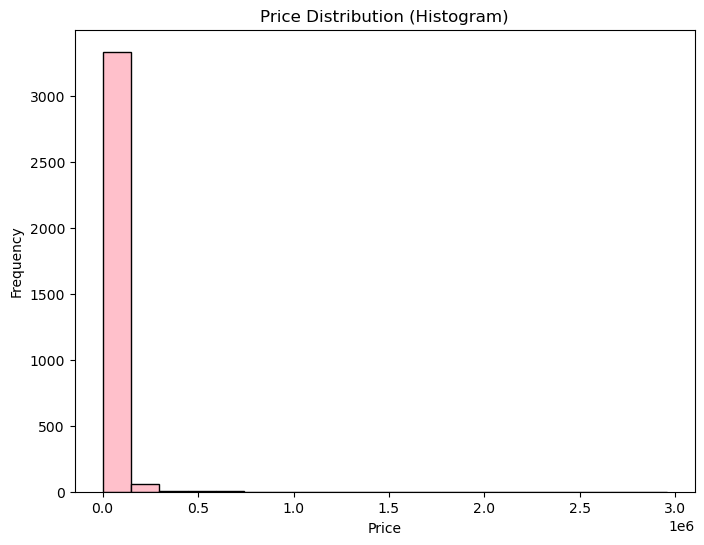

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
plt.hist(data['price'], bins=20, color='pink', edgecolor='black')
plt.title('Price Distribution (Histogram)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [37]:
#Yukarıdaki Histogram, çoğu arabanın alt fiyat aralığında yer aldığını gösteriyor. ,
# aslında Yukarıdaki grafikte görüldüğü gibi verilerde çok fazla aykırı değer var ve bu nedenle normal dağılıma yakın bir dağılım elde etmek için bunların kaldırılması gerekiyor.

C:\Users\GHOST-V3\AppData\Local\Temp\ipykernel_10296\2833861495.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['price'], color='purple', shade=True)


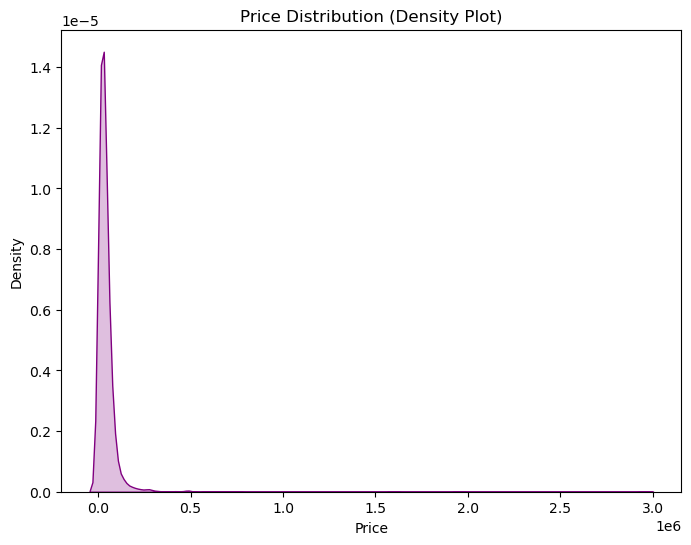

In [38]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data['price'], color='purple', shade=True)
plt.title('Price Distribution (Density Plot)')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

In [39]:
# tablo sağa doğru uzuyor çarpıklık var. 

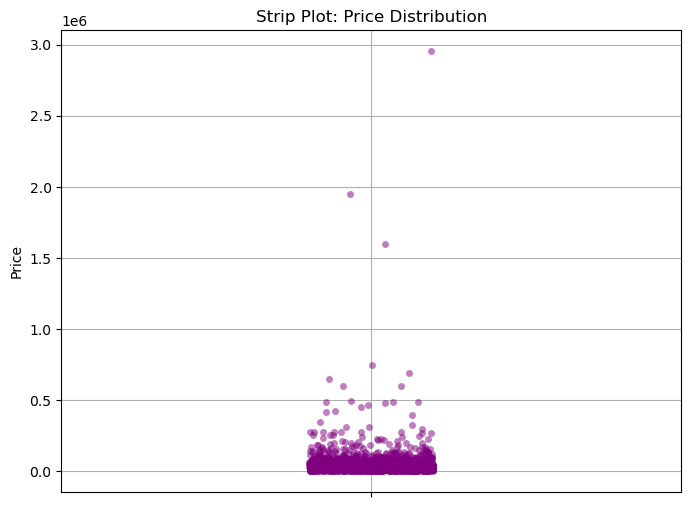

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.stripplot(data=data, y='price', jitter=True, color='purple', alpha=0.5)
plt.title('Strip Plot: Price Distribution')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [41]:
#keza burada da aykırı değerler var.

In [42]:
data['price'].describe()


count    3.413000e+03
mean     4.173439e+04
std      8.147277e+04
min      2.000000e+03
25%      1.590000e+04
50%      2.900000e+04
75%      4.750000e+04
max      2.954083e+06
Name: price, dtype: float64

In [43]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

31600.0


In [44]:
df = data[~((data['price'] < (Q1 - 1.5 * IQR)) |(data['price'] > (Q3 + 0.7 * IQR)))]
df.shape

(3012, 12)

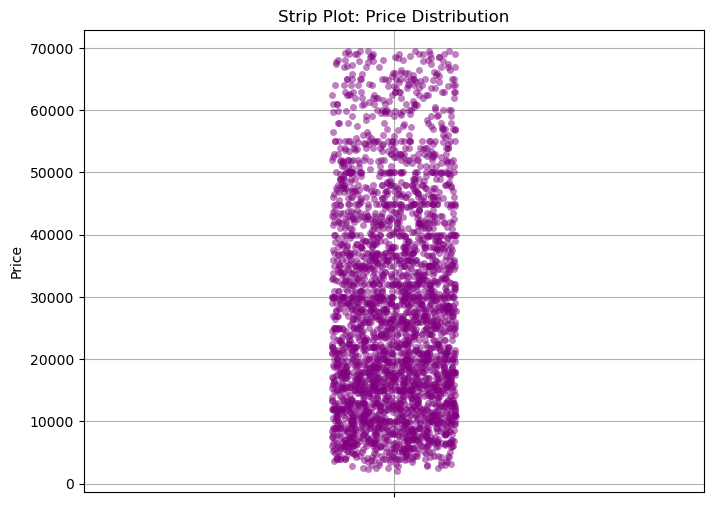

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.stripplot(data=df, y='price', jitter=True, color='purple', alpha=0.5)
plt.title('Strip Plot: Price Distribution')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [46]:
# biraz daha uygun oldu işimize yarar duruyor.

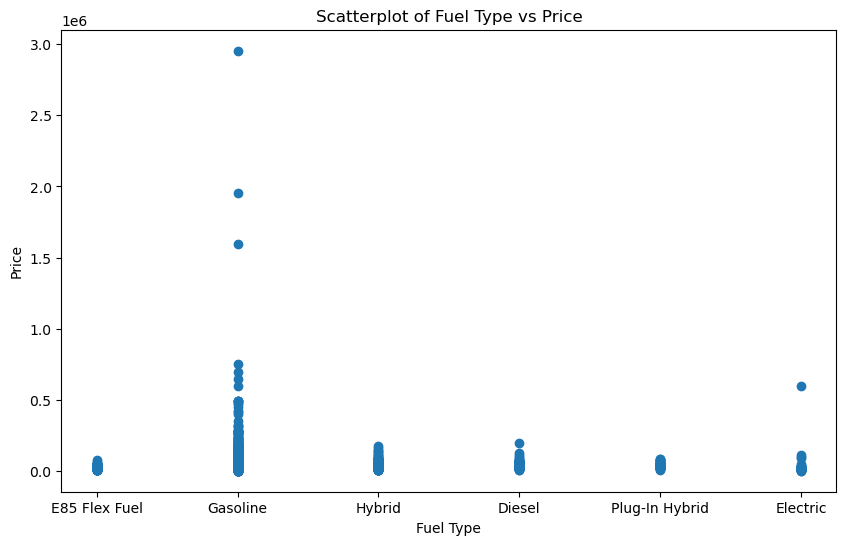

In [47]:
plt.figure(figsize = (10, 6))
plt.scatter(data['fuel_type'], data['price'])
plt.title('Scatterplot of Fuel Type vs Price')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

In [48]:
import pandas as pd

# Calculate quartiles
Q1 = df['price'].quantile(0.25)
Q2 = df['price'].median()
Q3 = df['price'].quantile(0.75)

# Define a function to categorize data points into quartiles
def categorize_quartile(value):
    if value < Q1:
        return "Q1 (25%)"
    elif value < Q2:
        return "Q2 (50%)"
    elif value < Q3:
        return "Q3 (75%)"
    else:
        return "Q4 (100%)"

# Apply the categorize_quartile function to the 'price' column
df['Quartile'] = df['price'].apply(categorize_quartile)

# Count the number of data points in each quartile
quartile_counts = df['Quartile'].value_counts().reset_index()
quartile_counts.columns = ['Quartile', 'Count']

# Display the quartile distribution table
print(quartile_counts)

    Quartile  Count
0  Q4 (100%)    756
1   Q2 (50%)    753
2   Q3 (75%)    752
3   Q1 (25%)    751


C:\Users\GHOST-V3\AppData\Local\Temp\ipykernel_10296\2028256079.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quartile'] = df['price'].apply(categorize_quartile)


In [49]:
data.describe()


,milage,price,Horsepower,Engine_Displacement,age
count,3413.000000,3.413000e+03,3413.000000,3413.000000,3413.000000
mean,70259.298857,4.173439e+04,331.445122,3.723119,8.158512
std,53276.080455,8.147277e+04,115.960298,1.388853,6.152927
min,100.000000,2.000000e+03,70.000000,0.650000,-1.000000
25%,27989.000000,1.590000e+04,255.000000,2.700000,3.000000
50%,60260.000000,2.900000e+04,328.000000,3.600000,7.000000
75%,100472.000000,4.750000e+04,395.000000,4.600000,12.000000
max,405000.000000,2.954083e+06,1020.000000,8.400000,49.000000


In [50]:
data['clean_title'].value_counts()


clean_title
Yes    3413
Name: count, dtype: int64

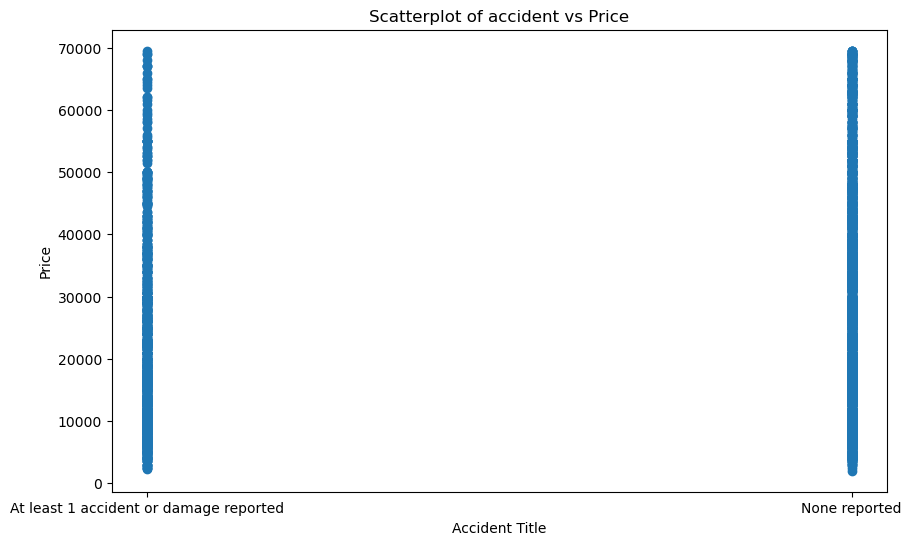

In [51]:
plt.figure(figsize = (10, 6))
plt.scatter(df['accident'], df['price'])
plt.title('Scatterplot of accident vs Price')
plt.xlabel('Accident Title')
plt.ylabel('Price')
plt.show()

In [52]:
df['clean_title'].nunique()


1

In [53]:
df.drop(['clean_title', 'accident', 'Quartile'], axis = 1, inplace = True)



C:\Users\GHOST-V3\AppData\Local\Temp\ipykernel_10296\2192045972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['clean_title', 'accident', 'Quartile'], axis = 1, inplace = True)


In [54]:
df.head(25)

,brand,milage,fuel_type,transmission,ext_col,int_col,price,Horsepower,Engine_Displacement,age
0,Ford,51000.0,E85 Flex Fuel,6-Speed A/T,Black,Black,10300.0,300.000000,3.7,10
1,Hyundai,34742.0,Gasoline,8-Speed Automatic,Moonlight Cloud,Gray,38005.0,331.445122,3.8,2
3,INFINITI,88900.0,Hybrid,7-Speed A/T,Black,Black,15500.0,354.000000,3.5,8
6,Audi,84000.0,Gasoline,6-Speed A/T,Blue,Black,31000.0,292.000000,2.0,6
7,BMW,242000.0,Gasoline,A/T,Green,Green,7300.0,282.000000,4.4,22
8,Lexus,23436.0,Gasoline,6-Speed A/T,Black,Black,41927.0,311.000000,3.5,2
12,Toyota,12500.0,Gasoline,A/T,Yellow,Black,53500.0,382.000000,3.0,2
13,Lincoln,18196.0,Gasoline,Transmission w/Dual Shift Mode,Black,Brown,62000.0,400.000000,3.0,1
15,Land,79800.0,Gasoline,A/T,White,Black,29990.0,375.000000,5.0,10
17,Dodge,61074.0,Gasoline,A/T,Black,Gray,16800.0,305.000000,3.6,10


In [55]:
#create a group of transmission, fuel_type and price
df_group = df.groupby(['transmission', 'fuel_type'])['price'].mean().reset_index()
#create a pivot table
df_pivot = df_group.pivot(index = 'transmission', columns = 'fuel_type', values = 'price')
df_pivot

fuel_type,Diesel,E85 Flex Fuel,Electric,Gasoline,Hybrid,Plug-In Hybrid
transmission,,,,,,
1-Speed A/T,NaN,NaN,NaN,39828.680000,NaN,NaN
1-Speed Automatic,NaN,NaN,NaN,30090.500000,NaN,NaN
10-Speed A/T,58874.750000,40300.000000,NaN,47948.000000,53750.000000,NaN
10-Speed Automatic,NaN,NaN,NaN,46507.387097,NaN,NaN
4-Speed A/T,17000.000000,11785.000000,12600.000000,13788.350000,20995.000000,NaN
4-Speed Automatic,NaN,22495.000000,NaN,15490.000000,NaN,NaN
5-Speed A/T,21612.375000,NaN,22500.000000,15381.945205,NaN,NaN
5-Speed Automatic,NaN,NaN,NaN,30264.750000,NaN,NaN
5-Speed M/T,NaN,NaN,10699.833333,14756.450980,NaN,NaN


In [56]:
df_pivot.fillna(df_pivot.mean(), inplace = True)
df_pivot

fuel_type,Diesel,E85 Flex Fuel,Electric,Gasoline,Hybrid,Plug-In Hybrid
transmission,,,,,,
1-Speed A/T,39818.461088,21328.820878,20808.419384,39828.680000,34977.914914,38165.982143
1-Speed Automatic,39818.461088,21328.820878,20808.419384,30090.500000,34977.914914,38165.982143
10-Speed A/T,58874.750000,40300.000000,20808.419384,47948.000000,53750.000000,38165.982143
10-Speed Automatic,39818.461088,21328.820878,20808.419384,46507.387097,34977.914914,38165.982143
4-Speed A/T,17000.000000,11785.000000,12600.000000,13788.350000,20995.000000,38165.982143
4-Speed Automatic,39818.461088,22495.000000,20808.419384,15490.000000,34977.914914,38165.982143
5-Speed A/T,21612.375000,21328.820878,22500.000000,15381.945205,34977.914914,38165.982143
5-Speed Automatic,39818.461088,21328.820878,20808.419384,30264.750000,34977.914914,38165.982143
5-Speed M/T,39818.461088,21328.820878,10699.833333,14756.450980,34977.914914,38165.982143


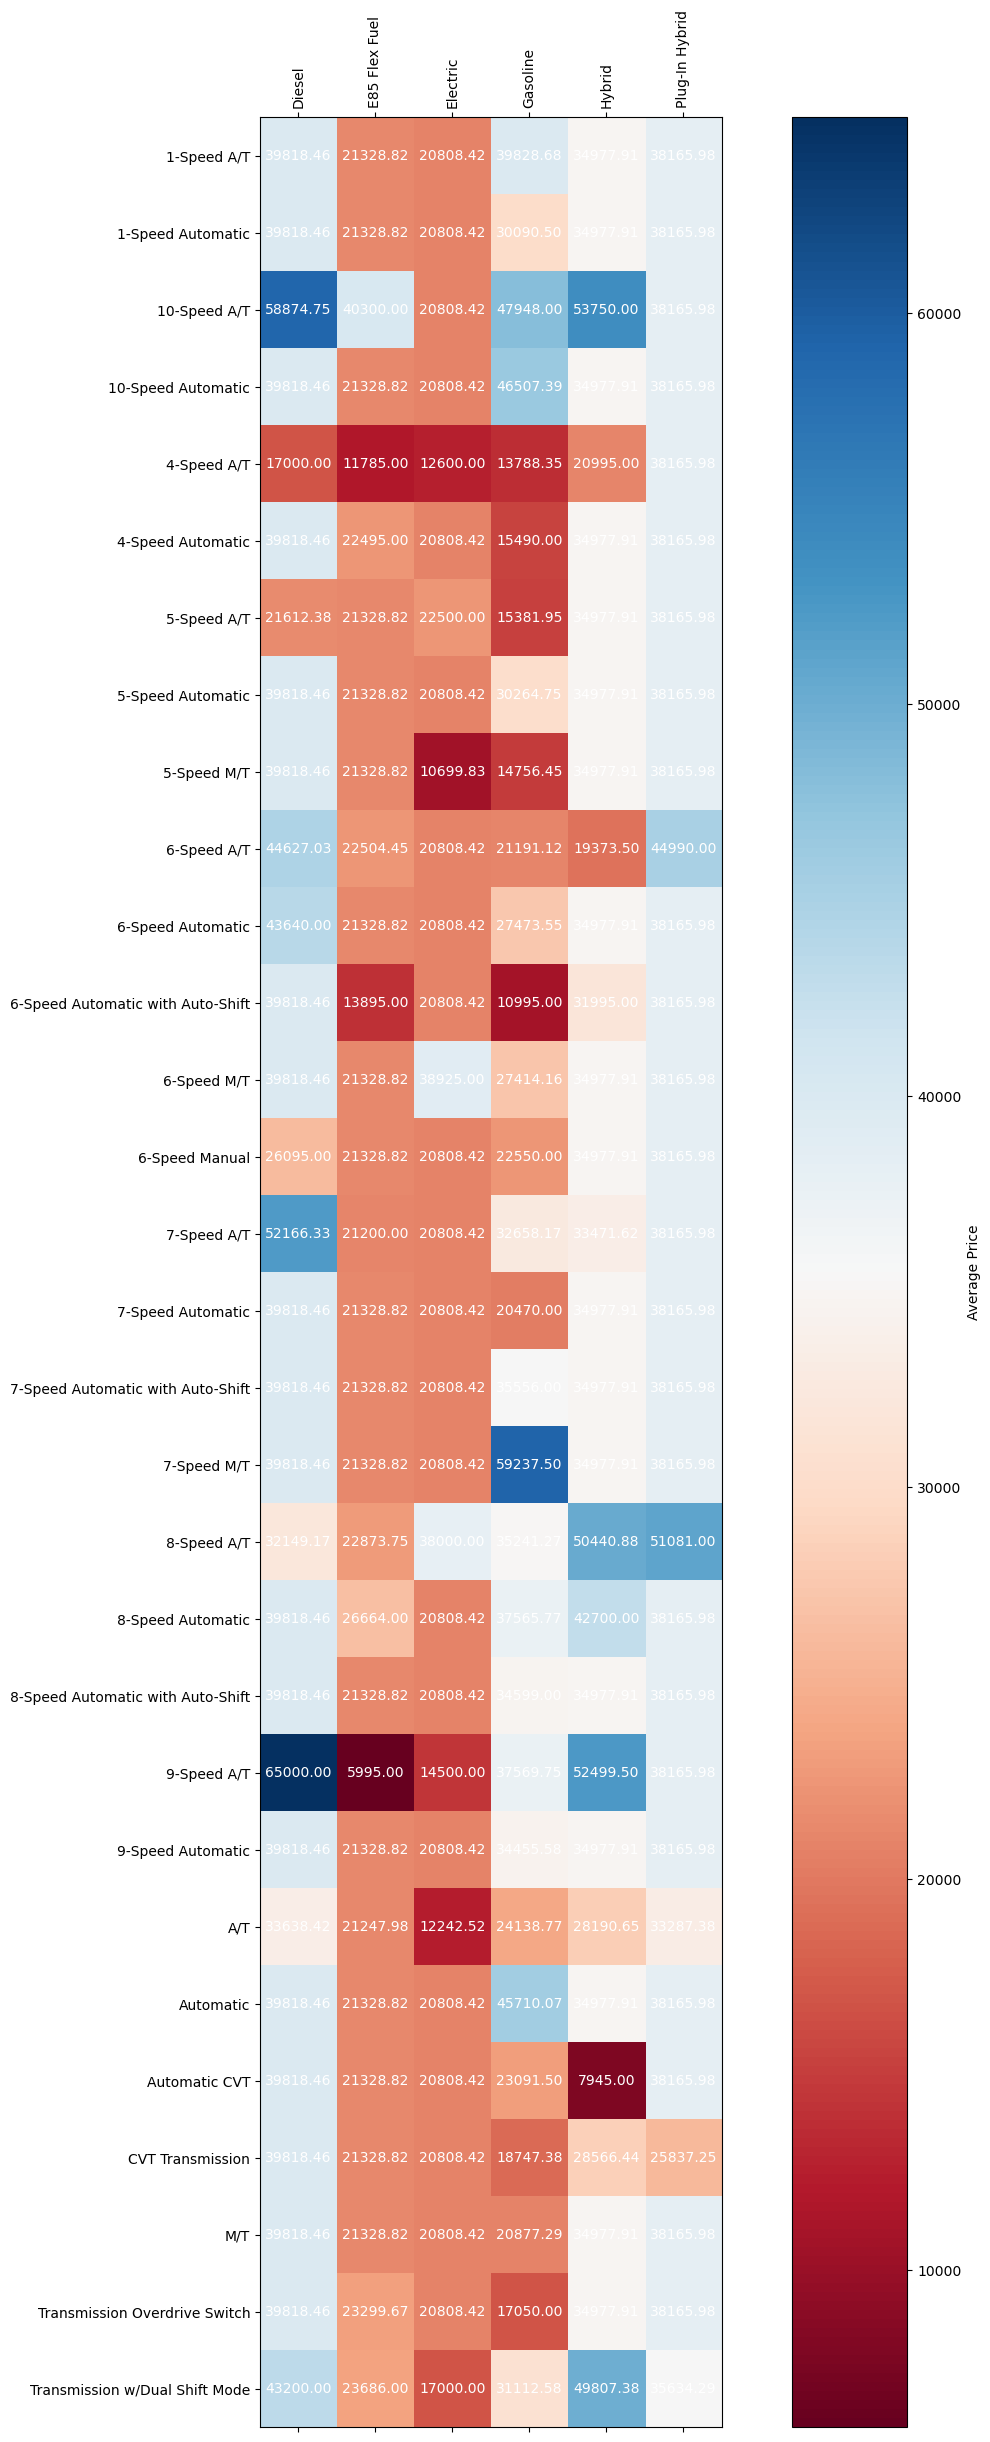

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a heatmap
fig, ax = plt.subplots(figsize=(18, 30), dpi=100)
cax = ax.matshow(df_pivot, cmap='RdBu')

# Label names
row_labels = df_pivot.columns
col_labels = df_pivot.index

# Move ticks and labels to the center
ax.set_xticks(np.arange(df_pivot.shape[1]))
ax.set_yticks(np.arange(df_pivot.shape[0]))

# Insert labels
ax.set_xticklabels(row_labels)
ax.set_yticklabels(col_labels)

# Rotate label if too long
plt.xticks(rotation=90)

# Add price numbers on each box
for i in range(len(col_labels)):
    for j in range(len(row_labels)):
        text = ax.text(j, i, f'{df_pivot.iloc[i, j]:.2f}', ha='center', va='center', color='w')

plt.colorbar(cax, label='Average Price')
plt.show()

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000., 400000., 450000.]),
 [Text(-50000.0, 0, '−50000'),
  Text(0.0, 0, '0'),
  Text(50000.0, 0, '50000'),
  Text(100000.0, 0, '100000'),
  Text(150000.0, 0, '150000'),
  Text(200000.0, 0, '200000'),
  Text(250000.0, 0, '250000'),
  Text(300000.0, 0, '300000'),
  Text(350000.0, 0, '350000'),
  Text(400000.0, 0, '400000'),
  Text(450000.0, 0, '450000')])

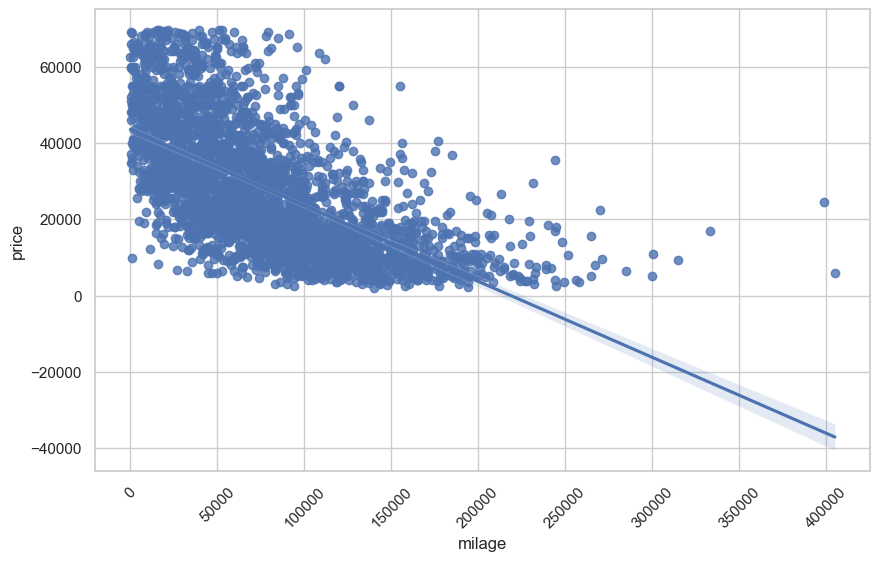

In [58]:
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.regplot(x = 'milage', y = 'price', data =df)
plt.xticks(rotation=45)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35')])

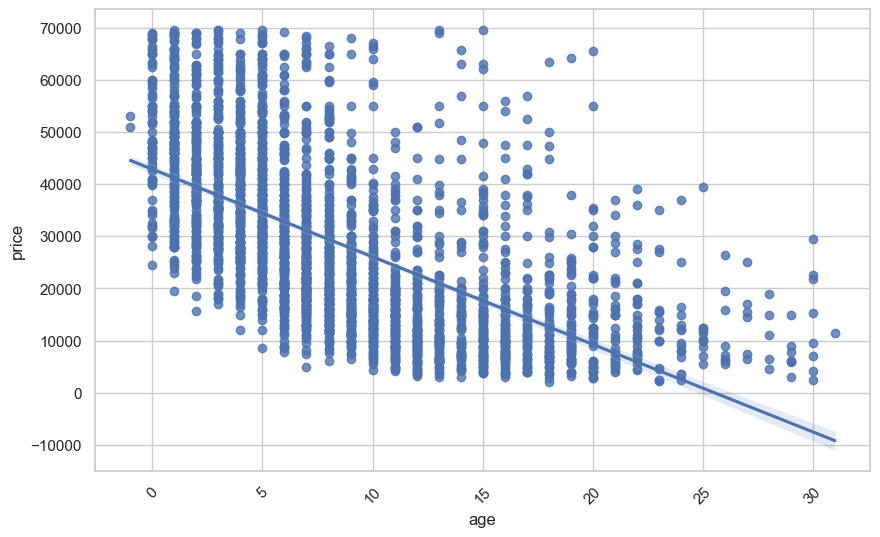

In [59]:
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.regplot(x = 'age', y = 'price', data =df)
plt.xticks(rotation=45)

C:\Users\GHOST-V3\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([-20.,   0.,  20.,  40.,  60.]),
 [Text(-20.0, 0, '−20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60')])

<Figure size 1000x600 with 0 Axes>

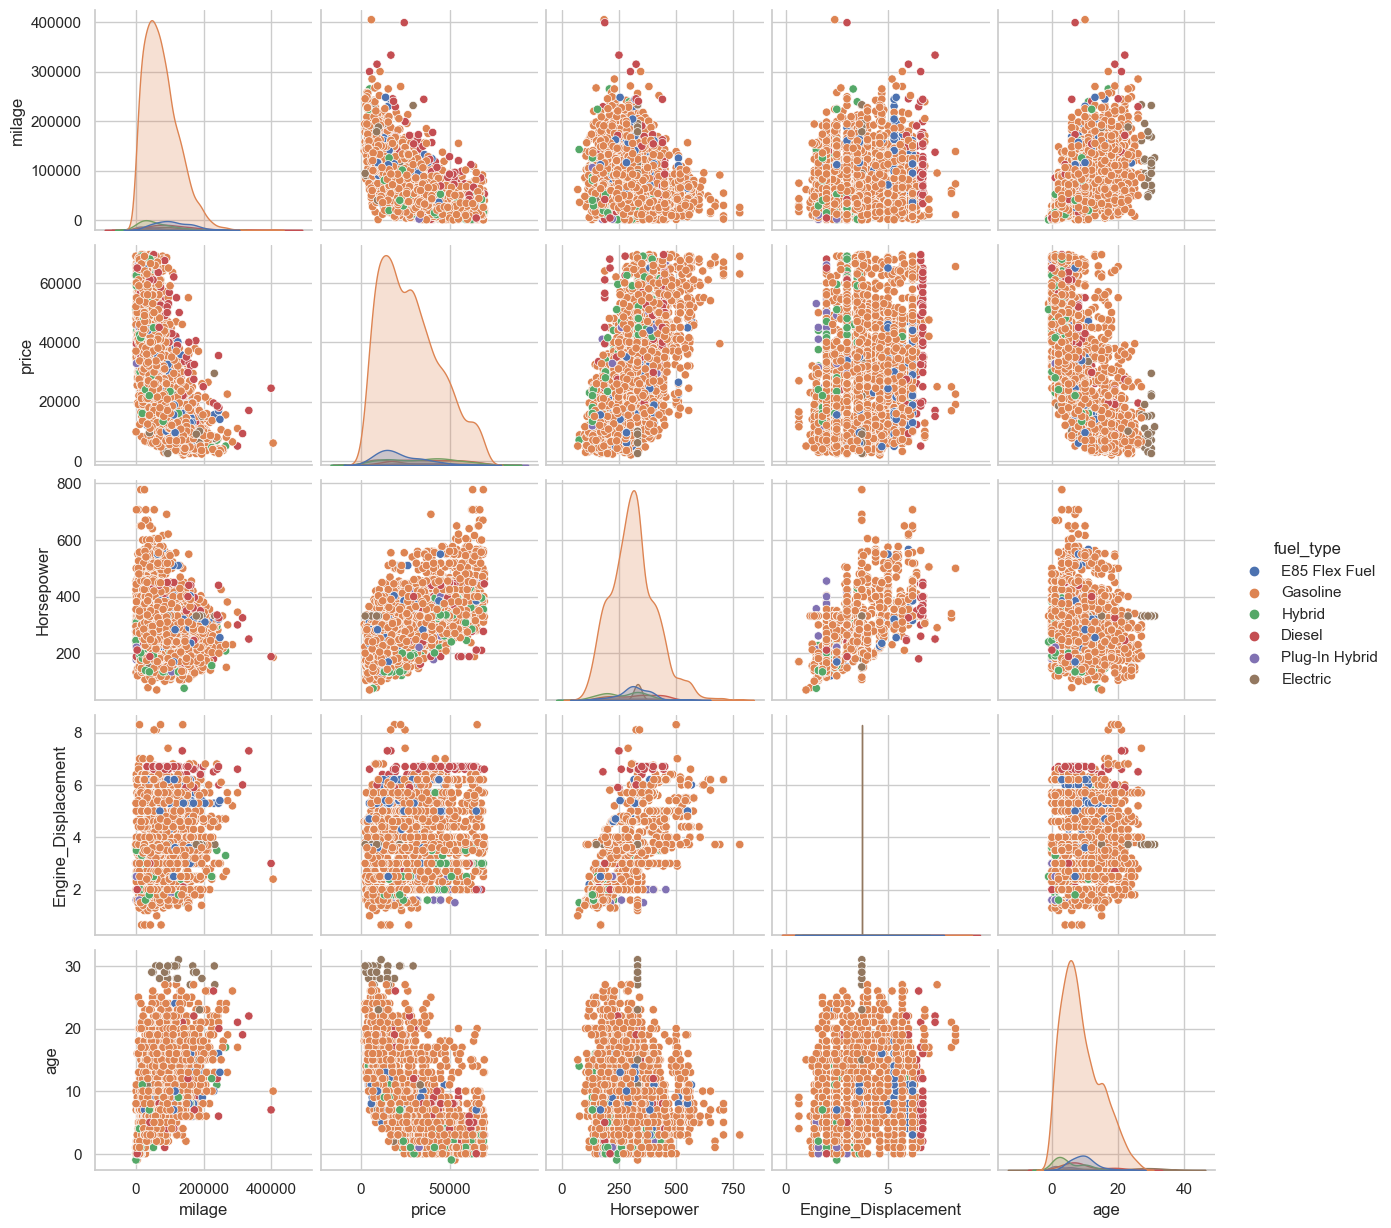

In [60]:
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.pairplot(df, hue = 'fuel_type')
plt.xticks(rotation=45)

In [61]:
 # Yani birisi bir arabayı satmak isterse - benzinliyse, yaşı küçükse, kilometresi düşükse, motor hacmi büyükse daha yüksek fiyata satacaktır.

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800., 900.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700'),
  Text(800.0, 0, '800'),
  Text(900.0, 0, '900')])

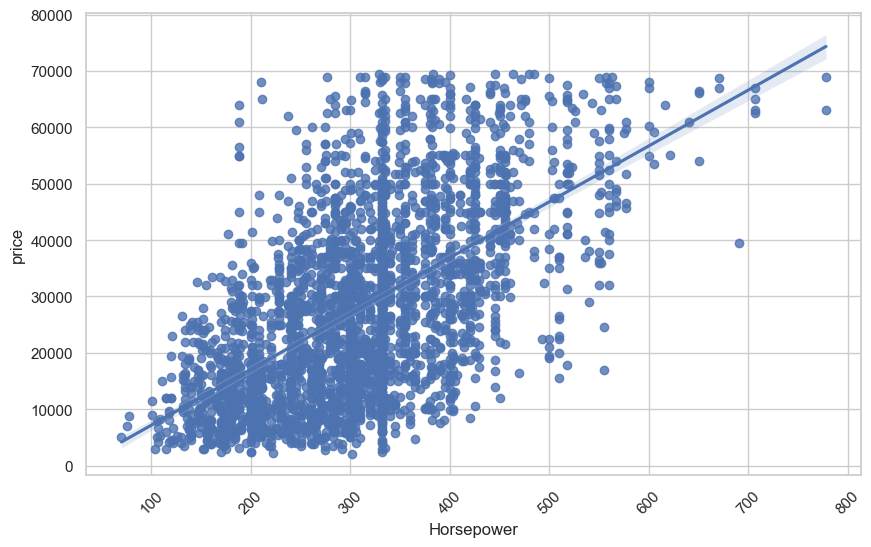

In [62]:
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.regplot(x = 'Horsepower', y = 'price', data =df)
plt.xticks(rotation=45)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9')])

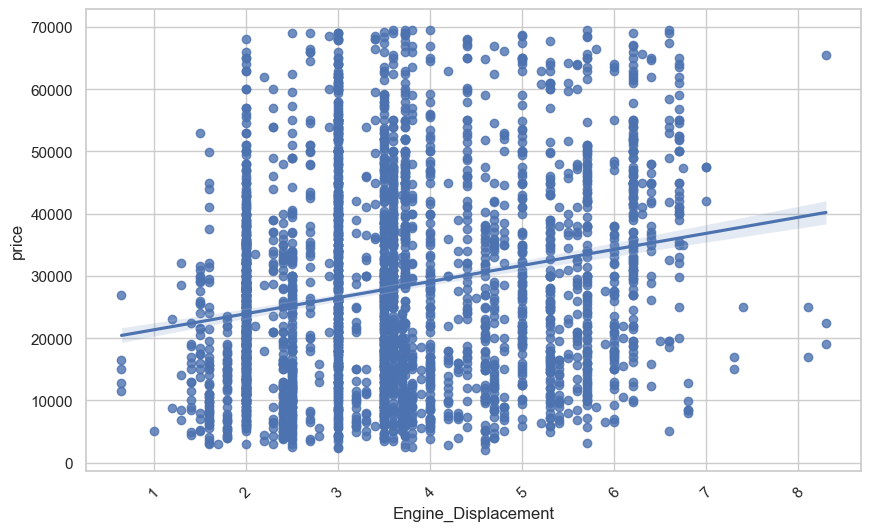

In [63]:
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.regplot(x = 'Engine_Displacement', y = 'price', data =df)
plt.xticks(rotation=45)

In [64]:
 #Motor beygir gücü arttıkça fiyat da artmaktadır. 

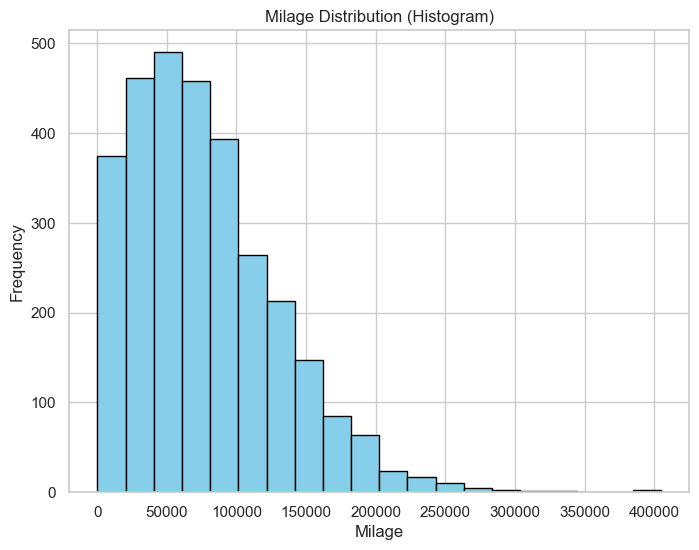

In [65]:
plt.figure(figsize=(8, 6))
plt.hist(df['milage'], bins=20, color='skyblue', edgecolor='black')
plt.title('Milage Distribution (Histogram)')
plt.xlabel('Milage')
plt.ylabel('Frequency')
plt.show()

In [66]:
 # Arabaların çoğunun kilometresi az.

In [67]:
data['fuel_type'].value_counts()


fuel_type
Gasoline          2959
Hybrid             145
E85 Flex Fuel      128
Diesel             102
Electric            46
Plug-In Hybrid      33
Name: count, dtype: int64

In [69]:
pip install category_encoders

  Obtaining dependency information for category_encoders from https://files.pythonhosted.org/packages/7f/e5/79a62e5c9c9ddbfa9ff5222240d408c1eeea4e38741a0dc8343edc7ef1ec/category_encoders-2.6.3-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   -------------------- ------------------- 41.0/81.9 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 81.9/81.9 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


C:\Users\GHOST-V3\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  return process_handler(cmd, _system_body)
C:\Users\GHOST-V3\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)
C:\Users\GHOST-V3\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  return process_handler(cmd, _system_body)


In [70]:
import category_encoders as ce
encoder = ce.TargetEncoder(cols=['fuel_type'])
df['fuel_type_target'] = encoder.fit_transform(df['fuel_type'], df['price'])
df.head()

C:\Users\GHOST-V3\AppData\Local\Temp\ipykernel_10296\1604936902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fuel_type_target'] = encoder.fit_transform(df['fuel_type'], df['price'])


,brand,milage,fuel_type,transmission,ext_col,int_col,price,Horsepower,Engine_Displacement,age,fuel_type_target
0,Ford,51000.0,E85 Flex Fuel,6-Speed A/T,Black,Black,10300.0,300.000000,3.7,10,21664.153704
1,Hyundai,34742.0,Gasoline,8-Speed Automatic,Moonlight Cloud,Gray,38005.0,331.445122,3.8,2,27922.857525
3,INFINITI,88900.0,Hybrid,7-Speed A/T,Black,Black,15500.0,354.000000,3.5,8,34203.951749
6,Audi,84000.0,Gasoline,6-Speed A/T,Blue,Black,31000.0,292.000000,2.0,6,27922.857525
7,BMW,242000.0,Gasoline,A/T,Green,Green,7300.0,282.000000,4.4,22,27922.857525


In [71]:
import category_encoders as ce
encoder = ce.TargetEncoder(cols=['transmission'])
df['transmission_target'] = encoder.fit_transform(df['transmission'], df['price'])
df.head()


C:\Users\GHOST-V3\AppData\Local\Temp\ipykernel_10296\1205527900.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transmission_target'] = encoder.fit_transform(df['transmission'], df['price'])


,brand,milage,fuel_type,transmission,ext_col,int_col,price,Horsepower,Engine_Displacement,age,fuel_type_target,transmission_target
0,Ford,51000.0,E85 Flex Fuel,6-Speed A/T,Black,Black,10300.0,300.000000,3.7,10,21664.153704,23625.939306
1,Hyundai,34742.0,Gasoline,8-Speed Automatic,Moonlight Cloud,Gray,38005.0,331.445122,3.8,2,27922.857525,36639.401193
3,INFINITI,88900.0,Hybrid,7-Speed A/T,Black,Black,15500.0,354.000000,3.5,8,34203.951749,32901.617416
6,Audi,84000.0,Gasoline,6-Speed A/T,Blue,Black,31000.0,292.000000,2.0,6,27922.857525,23625.939306
7,BMW,242000.0,Gasoline,A/T,Green,Green,7300.0,282.000000,4.4,22,27922.857525,24175.910160


In [72]:
import category_encoders as ce
encoder = ce.TargetEncoder(cols=['brand'])
df['brand_target'] = encoder.fit_transform(df['brand'], df['price'])
df.head()

C:\Users\GHOST-V3\AppData\Local\Temp\ipykernel_10296\3066718383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['brand_target'] = encoder.fit_transform(df['brand'], df['price'])


,brand,milage,fuel_type,transmission,ext_col,int_col,price,Horsepower,Engine_Displacement,age,fuel_type_target,transmission_target,brand_target
0,Ford,51000.0,E85 Flex Fuel,6-Speed A/T,Black,Black,10300.0,300.000000,3.7,10,21664.153704,23625.939306,30787.469512
1,Hyundai,34742.0,Gasoline,8-Speed Automatic,Moonlight Cloud,Gray,38005.0,331.445122,3.8,2,27922.857525,36639.401193,18469.649438
3,INFINITI,88900.0,Hybrid,7-Speed A/T,Black,Black,15500.0,354.000000,3.5,8,34203.951749,32901.617416,22000.786203
6,Audi,84000.0,Gasoline,6-Speed A/T,Blue,Black,31000.0,292.000000,2.0,6,27922.857525,23625.939306,29660.234575
7,BMW,242000.0,Gasoline,A/T,Green,Green,7300.0,282.000000,4.4,22,27922.857525,24175.910160,30589.837456


In [73]:
df.drop(['ext_col', 'int_col'], axis = 1, inplace = True)
df.head()

C:\Users\GHOST-V3\AppData\Local\Temp\ipykernel_10296\1827513002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['ext_col', 'int_col'], axis = 1, inplace = True)


,brand,milage,fuel_type,transmission,price,Horsepower,Engine_Displacement,age,fuel_type_target,transmission_target,brand_target
0,Ford,51000.0,E85 Flex Fuel,6-Speed A/T,10300.0,300.000000,3.7,10,21664.153704,23625.939306,30787.469512
1,Hyundai,34742.0,Gasoline,8-Speed Automatic,38005.0,331.445122,3.8,2,27922.857525,36639.401193,18469.649438
3,INFINITI,88900.0,Hybrid,7-Speed A/T,15500.0,354.000000,3.5,8,34203.951749,32901.617416,22000.786203
6,Audi,84000.0,Gasoline,6-Speed A/T,31000.0,292.000000,2.0,6,27922.857525,23625.939306,29660.234575
7,BMW,242000.0,Gasoline,A/T,7300.0,282.000000,4.4,22,27922.857525,24175.910160,30589.837456


In [74]:
df['fuel_type_target'].corr(df['price'])


0.1864617625648253

In [75]:
df['transmission_target'].corr(df['price'])


0.4398676792227658

In [76]:
df['brand_target'].corr(df['price'])


0.3756527532876745

In [77]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
x = df[['brand_target']]
y = df[['price']]
lm.fit(x,y)

LinearRegression()

In [78]:
yhat = lm.predict(x)
yhat[0:5]

array([[30823.9005172 ],
       [17341.75917746],
       [21206.67071733],
       [29590.1155895 ],
       [30607.58762244]])

In [79]:
lm.intercept_


array([-2873.70287014])

In [80]:
lm.coef_


array([[1.09452332]])

In [81]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], yhat)
mse

235946441.75934535

In [82]:
rmse = np.sqrt(mse)
rmse

15360.548224570155

In [83]:
from sklearn.metrics import r2_score
r2_score(df['price'], yhat)

0.14111499105261005

In [84]:
Z = df[['brand_target', 'fuel_type_target', 'transmission_target', 'age', 'milage', 'Horsepower', 'Engine_Displacement']]
Z.head()

,brand_target,fuel_type_target,transmission_target,age,milage,Horsepower,Engine_Displacement
0,30787.469512,21664.153704,23625.939306,10,51000.0,300.000000,3.7
1,18469.649438,27922.857525,36639.401193,2,34742.0,331.445122,3.8
3,22000.786203,34203.951749,32901.617416,8,88900.0,354.000000,3.5
6,29660.234575,27922.857525,23625.939306,6,84000.0,292.000000,2.0
7,30589.837456,27922.857525,24175.910160,22,242000.0,282.000000,4.4


In [85]:
lm.fit(Z, y)


LinearRegression()

In [86]:
yhat2 = lm.predict(Z)
yhat2[0:5]

array([[25658.55236718],
       [37149.26665632],
       [32198.1013444 ],
       [26930.46116981],
       [-2390.0707537 ]])

In [87]:
lm.intercept_


array([-7915.23321379])

In [88]:
lm.coef_


array([[ 3.27292867e-01,  6.78321367e-01,  6.51304580e-02,
        -8.24286704e+02, -1.15052933e-01,  5.94235846e+01,
         9.58575961e+02]])

In [89]:
lm.score(Z, y)


0.710509274146341

In [90]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], yhat2)
mse

79526718.9157389

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Z, y, test_size = 0.2, random_state = 0)

In [92]:
lm.fit(x_train, y_train)


LinearRegression()

In [93]:
yhat3 = lm.predict(x_test)
yhat3[0:5]

array([[33243.02632485],
       [37566.05346629],
       [28046.71816493],
       [22787.48228468],
       [30428.40203856]])

In [94]:
lm.score(x_test, y_test)


0.7137180377081791

In [95]:
from sklearn.metrics import r2_score
r2_score(y_test, yhat3)

0.7137180377081791